In [128]:
import pandas as pd
import matplotlib.pyplot as plt 
import pylab
import matplotlib.dates as mdates
import datetime as datetime 
import time

In [129]:
df = pd.read_csv('~/DataAnalysis/jobqueue_weather_data/pyzabbix_export_combined.csv', parse_dates=[['date', 'time']],header=None, names=['date', 'time', 'value'])
df.head(500)



,date_time,value
0,2017-10-23 12:29:06,80
1,2017-10-23 12:28:07,77
2,2017-10-23 12:27:06,95
3,2017-10-23 12:26:06,86
4,2017-10-23 12:25:07,71
5,2017-10-23 12:24:06,67
6,2017-10-23 12:23:06,67
7,2017-10-23 12:22:06,67
8,2017-10-23 12:21:07,70
9,2017-10-23 12:20:06,72


          date   value                                                  \
                 count         mean          std    min     25%    50%   
0   10/02/2017   690.0   252.814493   447.912287   46.0   55.00   61.0   
1   10/03/2017  1440.0   716.705556   750.198375  127.0  261.00  285.5   
2   10/04/2017  1440.0   926.597222  1249.087353   89.0  103.00  113.0   
3   10/05/2017  1440.0   339.896528   520.017561   51.0   71.00   84.0   
4   10/06/2017  1440.0   473.779861   750.243640   24.0   73.00   93.0   
5   10/07/2017  1440.0   637.585417   744.074681  101.0  206.00  429.0   
6   10/08/2017  1440.0   368.618750   621.409302   37.0   56.00   75.5   
7   10/09/2017  1440.0   489.211111   728.201938   14.0   35.00  108.0   
8   10/10/2017  1440.0   690.493056   802.989104  102.0  117.00  493.0   
9   10/11/2017  1440.0   725.772917   801.255658   46.0  106.00  454.5   
10  10/12/2017  1440.0   547.272222   881.218974   12.0   26.75   57.0   
11    10/13/17  1440.0   526.977778   

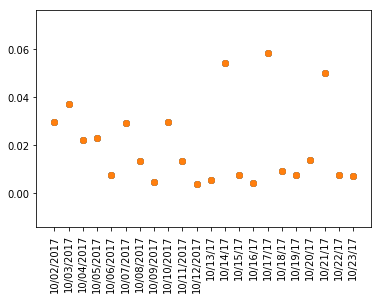

In [146]:

dt = pd.read_csv('~/DataAnalysis/jobqueue_weather_data/pyzabbix_export_combined.csv', header=None, names=['date', 'time', 'value'])
var1 = dt.drop(['time'], axis=1) 

# OK now try group by instead.


grouped = var1.groupby('date')
daily_max = grouped.max()
daily_min = grouped.min()
daily_weather_summary = grouped.describe()

def ratio(x):
    return x[3] / x[7]

daily_weather_summary['max min ratio'] = daily_weather_summary.apply(ratio, axis=1)
daily_weather_summary_reindex = daily_weather_summary.reset_index()
print (daily_weather_summary_reindex)
max_min_ratio =  daily_weather_summary['max min ratio']

plt.scatter(daily_weather_summary_reindex['date'], daily_weather_summary_reindex['max min ratio'] )

plt.plot_date(x=daily_weather_summary_reindex['date'], y=daily_weather_summary_reindex['max min ratio'])

plt.xticks(rotation=90)
plt.show()




# can't use a dict here due to the duplicate values

# var1_list = var1['date'].tolist()
# unique_dates = set(var1_list)
# print unique_dates


# new_list = []

# for date in unique_dates:
#     for y in var_dict:       
#         if (y == date):
#             new_list.append(var_dict[y])
#     print new_list    


# for jobqueuedate in var_dict:
#     for y in var_dict:
#         values_list = []
#         if(jobqueuedate == y):
#             print("match", y)
#             values_list.append(var_dict[y])
#             print values_list
# #     print "{}: {},{}".format(jobqueuedate, max(values_list), min(values_list))                               
         